<a href="https://colab.research.google.com/github/LaiTriMinh/project/blob/main/phan_loai_gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/cac loai gao

/content/drive/MyDrive/cac loai gao


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/cac loai gao/train',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cac loai gao/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1052 images belonging to 7 classes.
Found 302 images belonging to 7 classes.


In [4]:
training_set.class_indices
test_set.class_indices

{'Hàm châu': 0,
 'Lài miên': 1,
 'Nàng xuân': 2,
 'ST24': 3,
 'ST25': 4,
 'Thơm hương lài': 5,
 'lứt': 6}

In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
33/33 [==============================] - 446s 13s/step - loss: 1.4189 - accuracy: 0.5960 - val_loss: 0.5285 - val_accuracy: 0.7947
Epoch 2/100
33/33 [==============================] - 10s 292ms/step - loss: 0.5119 - accuracy: 0.8051 - val_loss: 0.4237 - val_accuracy: 0.8377
Epoch 3/100
33/33 [==============================] - 10s 293ms/step - loss: 0.4419 - accuracy: 0.8080 - val_loss: 0.3384 - val_accuracy: 0.8642
Epoch 4/100
33/33 [==============================] - 10s 294ms/step - loss: 0.3953 - accuracy: 0.8384 - val_loss: 0.4148 - val_accuracy: 0.8278
Epoch 5/100
33/33 [==============================] - 10s 293ms/step - loss: 0.4182 - accuracy: 0.8194 - val_loss: 0.3952 - val_accuracy: 0.8477
Epoch 6/100
33/33 [==============================] - 10s 289ms/step - loss: 0.3832 - accuracy: 0.8298 - val_loss: 0.3729 - val_accuracy: 0.8576
Epoch 7/100
33/33 [==============================] - 10s 292ms/step - loss: 0.3491 - accuracy: 0.8432 - val_loss: 0.3066 - val_accuracy: 

In [9]:
model.save('gao.h5')

In [10]:
model_gao = load_model('gao.h5')

In [11]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.021930620074272156
Train Accuracy 0.9952471256256104


1/1 [==============================] - 0s 52ms/step
Đây là gạo: lứt


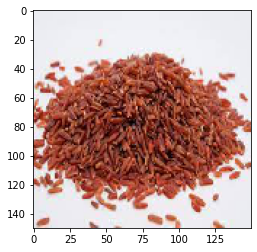

In [13]:
img = load_img('/content/gao.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_gao=['Hàm châu',
 'Lài miên',
 'Nàng xuân',
 'ST24',
 'ST25',
 'Thơm hương lài',
 'lứt']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là gạo:", class_gao[a])